#  Basic usage tutorial 

## Installation

Please refer to [installation](https://pyfragdocument.readthedocs.io/en/latest/install.html)   

## Job Prepration

In [1]:
!source $PYFRAGHOME/.pyfragrc

Before this command, the PYFRAGHOME path has to be set correctly!

In [2]:
%mkdir pyfrag

mkdir: pyfrag: File exists


In [3]:
%cp $PYFRAGHOME/example/job.in ./pyfrag

In [4]:
%cd pyfrag

/Users/xiaobo/Dropbox/jupyter-notebook/pyfrag


In [5]:
%ls

job.in  result/


**Noted** For each job a new directory and a new job name should be given. Don't put more than one jobs in one directory, othervise may cause clash.

Something like this will shown if previous steps is correct. Now we are ready to start PyFrag.
```bash
Xiaobos-MacBook-Air:pyfrag xiaobo$ ls
job.in
Xiaobos-MacBook-Air:pyfrag xiaobo$ 
```

## Input Explanation

In [6]:
%cat job.in

JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END


ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA



scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END


PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END




Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       

Explanation of input option!

```python

''''
JOBSUB section is for the information passed to the remote host machine 
where the heavy computatonal job is done! It is written in the fashion of Slurm.
''''
JOBSUB

#!/bin/bash
#SBATCH -J frag_1
#SBATCH -N 1
#SBATCH -t 50:00
#SBATCH --ntasks-per-node=24
#SBATCH --partition=short
#SBATCH --output=%job.stdout
#SBATCH --error=%job.stdout
export NSCM=24

JOBSUB END

''''
Provide the parameters for a DFT calculation using ADF software.
''''
ADF

basis
type TZ2P
core Small
end

xc
gga OPBE
end

relativistic SCALAR ZORA

scf
iterations 299
converge 0.00001
mixing 0.20
end

numericalquality verygood

charge 0 0
symmetry auto


ADF END

''''
Provide the parameters for an activation strain analysis.
''''

PyFrag

fragment  2
fragment  1 3 4 5 6
strain    0
strain   -554.09
bondlength 1 6  1.09

PyFrag END


''''
Guseed geometry coordinate for reactent1, reactent2, reactent complex,
transition state and product.
''''

Geometrycoor

R1: Fe-II(CO)4 + CH4
Pd       0.00000000       0.00000000       0.32205546



R2: CH4
C       0.00000000       0.00000000      -1.93543634
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429




RC: Fe-II(CO)4 + CH4
C       0.00000000       0.00000000      -1.93543615
Pd       0.00000000       0.00000000       0.322055
H      -0.96181082       0.00000000      -1.33610429
H       0.00000000      -0.90063254      -2.55201285
H       0.00000000       0.90063254      -2.55201285
H       0.96181082       0.00000000      -1.33610429



TS: Fe-II(CO)4 + CH4
C      -1.74196777      -2.22087997       0.00000000
Pd     -2.13750904      -0.23784341       0.00000000
H      -2.80956968      -2.49954731       0.00000000
H      -1.26528821      -2.62993236       0.8956767
H      -1.26528821      -2.62993236      -0.895676
H      -0.75509932      -0.88569836       0.00000000




P: Fe-II(CO)4 + CH4
C      -2.10134690      -2.41901732       0.1862099
Pd      -2.73145901      -0.57025833       0.419766
H      -3.88639130      -1.04648079      -0.43099501
H      -2.78392696      -3.12497645       0.66994616
H      -1.97386865      -2.66955518      -0.87144525
H      -1.12556673      -2.41201402       0.698583



Geometrycoor END
```

## Job start
PyFrag has several commands, which are explained by running `pyfrag -h` 

In [7]:
!pyfrag -h

Usage: /Users/xiaobo/gitpyfrag/bin/pyfrag [-h] [-s] [-x command]  [...]
 
       -h          : print this information
       -s          : run job quietly
       -x command  : start the executable named command
                   : command include restart, which restart job
                   : end, which terminate job
                   : check, which check the latest jobs information
                   : restart, which restart a job after it is stoped
                   : summary, which summarize all job result after jobs finished
                   : default command is pyfrag itself
The example command is like as follow, in which job.in is job input
/Users/xiaobo/gitpyfrag/bin/pyfrag job.in
or
/Users/xiaobo/gitpyfrag/bin/pyfrag -x restart job.in
or
/Users/xiaobo/gitpyfrag/bin/pyfrag -s -x summary job.in


### PyFrag commands
To run a job quietly, that is, job runs in the background, add -s flag, or it will print the latest information

* **end**
> To terminate a job.
* **restart**
> To restart a job provided a job is not running.
* **check**
> Check the latest job information provided a job is running.
* **summary**
> Summary all job information provided a job is finished.

### Job Runnig

In [ ]:
!pyfrag job.in

[cartesius.surfsara.nl] Executing task 'deploy'
[cartesius.surfsara.nl] Executing task 'deploy'
[cartesius.surfsara.nl] run: if [ ! -d /home/x2sun/pyfragtest_2/job ]; then mkdir /home/x2sun/pyfragtest_2/job; fi
[cartesius.surfsara.nl] put: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/job.in -> /home/x2sun/pyfragtest_2/job/job.in
[cartesius.surfsara.nl] run: bash $HOSTPYFRAG/argueparce/argueparce.sh job.in
[cartesius.surfsara.nl] run: source activate qmworks
[cartesius.surfsara.nl] out: discarding /home/x2sun/miniconda3/bin from PATH
[cartesius.surfsara.nl] out: prepending /home/x2sun/miniconda3/envs/qmworks/bin to PATH
[cartesius.surfsara.nl] out: 

[cartesius.surfsara.nl] run: sbatch sub > jobinfo.txt

Done.
Disconnecting from cartesius.surfsara.nl... done.
[cartesius.surfsara.nl] run: bash $HOSTPYFRAG/result/result.sh
[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/jobstate.txt <- /home/x2sun/pyfragtest_2/job/result/jobstate.txt


[cartesius.su

[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/r1converge.txt <- /home/x2sun/pyfragtest_2/job/result/r1converge.txt


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/jobstate.txt <- /home/x2sun/pyfragtest_2/job/result/jobstate.txt


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/rcgeometry.xyz <- /home/x2sun/pyfragtest_2/job/result/rcgeometry.xyz


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/tsconverge.txt <- /home/x2sun/pyfragtest_2/job/result/tsconverge.txt


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/r1geometry.xyz <- /home/x2sun/pyfragtest_2/job/result/r1geometry.xyz


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/r2converge.txt <- /home/x2sun/pyfragtest_2/job/result/r2converge.txt


[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/

[cartesius.surfsara.nl] download: /Users/xiaobo/Dropbox/jupyter-notebook/pyfrag/result/runstate.txt <- /home/x2sun/pyfragtest_2/job/result/runstate.txt


[localhost] local: bash $PYFRAGHOME/process/figure.sh
Failed to sort numerically, switching to alphabetic sort
['ircgeometry1.png']
Frame 0
The output video is video.mp4
[localhost] local: bash $PYFRAGHOME/server/web.sh job
[localhost] local: bash $PYFRAGHOME/server/bokeh.sh
2019-02-09 13:32:52,981 Starting Bokeh server version 0.13.0 (running on Tornado 5.1)
2019-02-09 13:32:52,988 Bokeh app running at: http://localhost:13790/stocks
2019-02-09 13:32:52,988 Starting Bokeh server with process id: 36156
        E     E_     c_max    ...     t1_s_rms  t1_s_rms_  t1_sr_TF
step                          ...                                  
0     0.0  0.000  0.000000    ...     0.000000   0.000000         0
1     0.0  0.001  0.000009    ...     0.000089   0.006667         T

[2 rows x 32 columns] p
2019-02-09 13:32:53,705 200 GET /stocks (:

## Job Result
Once job is finished, you can check the job result by running`pyfrag -x summary job` in job directory
or `!bokeh serve --show stocks` in result directory where stocks is located. A website will pop up which 
summarize all data in a vivid way.

In [8]:
!bokeh serve --show ../stocks

2019-02-09 13:24:33,999 Starting Bokeh server version 0.13.0 (running on Tornado 5.1)
2019-02-09 13:24:34,004 Bokeh app running at: http://localhost:5006/stocks
2019-02-09 13:24:34,005 Starting Bokeh server with process id: 34133
        E     E_     c_max    ...     t1_s_rms  t1_s_rms_  t1_sr_TF
step                          ...                                  
0     0.0  0.000  0.000000    ...     0.000000   0.000000         0
1     0.0  0.001  0.000016    ...     0.000178   0.006667         T
2     0.0  0.001  0.000009    ...     0.000089   0.006667         T

[3 rows x 32 columns] p
2019-02-09 13:24:34,917 200 GET /stocks (::1) 352.69ms
2019-02-09 13:24:35,918 101 GET /stocks/ws?bokeh-protocol-version=1.0&bokeh-session-id=XzT3Td1Rl4a76AfZhbxD8QSxJvDGI8IBLLf0rnE7gblm (::1) 1.37ms
2019-02-09 13:24:35,919 WebSocket connection opened
2019-02-09 13:24:35,919 ServerConnection created
2019-02-09 13:24:36,992 WebSocket connection closed: code=None, reason=None
Received signal 15, shutting

**Note that sometimes you need to use this command:**
```bash
kill $(ps aux | grep '[b]okeh' | awk '{print $2}') 2>/dev/null
```
**to stop bokeh server running!**

In [9]:
%ls

job.in  result/


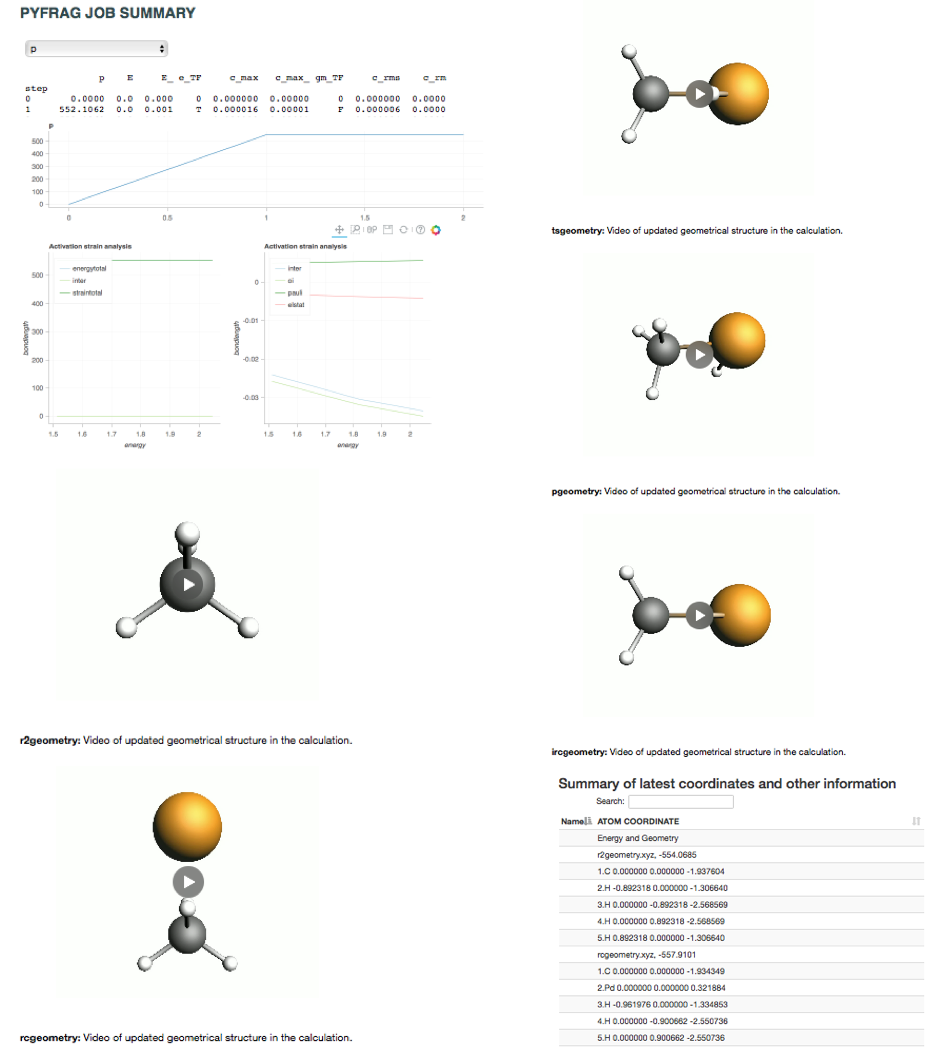

In [11]:
from IPython.display import Image
Image(filename="../files/jobresult.png")

Essentionally four parts of all information 